In [1]:
import shape_from_stereo as a7_func
import matplotlib.pyplot as plt
import numpy as np

### Load Images and Convert to Grayscale

In [ ]:
#img1,img2 = a7_func.load_images('bull/im0.ppm', 'bull/im1.ppm', rescale = 1)
# img1,img2 = a7_func.load_images('test_images/JPEG 01.jpeg', 'test_images/JPEG 02.jpeg', rescale = 4)
# img1,img2 = a7_func.load_images('IMG_4414.jpg', 'IMG_4415.jpg', rescale = 5)
#img1, img2 = img1[1000:2000,500:2500], img2[1000:2000,500:2500]

rescale = 1
img1,img2 = a7_func.load_images('JPEG image 4.jpeg', 'JPEG image 5.jpeg', rescale)
img1.shape

In [ ]:
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(img1, cmap = 'gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap = 'gray')
plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/grayscale.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Find Matching Points

In [ ]:
key1,key2,des1,des2,matches = a7_func.find_matching_points(img1,img2, 'ORB')

In [ ]:
import cv2
output_image1 = cv2.drawKeypoints(img1, key1, img1, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
output_image2 = cv2.drawKeypoints(img2, key2, img2, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(output_image1)
plt.axis('off')

plt.subplot(122)
plt.imshow(output_image2)
plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/key_features.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Estimate Fundamental Matrix

In [ ]:
pts1, pts2, good_matches, F, inliers = a7_func.estimate_fundamental_matrix(key1, key2, matches, 0.5)

In [ ]:
print(len(good_matches))
limit = 500
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=good_matches[:limit],
               flags=cv2.DrawMatchesFlags_DEFAULT)

keypoint_matches = cv2.drawMatchesKnn(img1, key1, img2, key2, matches[:limit], None, **draw_params)
plt.figure(figsize = (20,10))
plt.imshow(keypoint_matches)
plt.axis('off')
plt.savefig('Figures/matching_points.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Rectify Images

In [ ]:
img5, img3 = a7_func.find_epilines(img1,img2,pts1,pts2,F)
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(img5)
plt.axis('off')
plt.subplot(122)
plt.imshow(img3)
plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/epilines.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
threshold = 0
img1_rec, img2_rec = a7_func.rectify_images(img1,img2,pts1,pts2,F, threshold)

In [ ]:
plt.figure(figsize = (10,20))
plt.subplot(121)
plt.imshow(img1_rec, cmap = 'gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2_rec, cmap = 'gray')
plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/rectify.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
numDisparities = 16*4
blockSize = 5+(2*3)
disparity = a7_func.get_disparity_map(img1,img2,numDisparities, blockSize)
disparity_rec = a7_func.get_disparity_map(img1_rec,img2_rec,numDisparities, blockSize)
#disparity_rec = a7_func.get_disparity_map(img1,img2_rec2,numDisparities, blockSize)

plt.figure(figsize = (21,10))
plt.subplot(121)
plt.imshow(disparity, cmap = 'gnuplot')
plt.xticks([])
plt.yticks([])
plt.title('Disparity Map', fontsize = 20)
plt.colorbar(shrink = 1.0)

plt.subplot(122)
plt.imshow(disparity_rec, cmap = 'gnuplot')
plt.title('Disparity Map (rectified)', fontsize = 20)
plt.colorbar(shrink = 1.0)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures_down/disparity_{}.png'.format(rescale), dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0, disparity.shape[1], 1)
y = np.arange(0, disparity.shape[0], 1)

X, Y = np.meshgrid(x,y)
Z = disparity

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(Z)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 35, azim = 215)
plt.title('Disparity map', fontsize = 20)
plt.colorbar(mappable, shrink = 0.3)

#second
x = np.arange(0, disparity_rec.shape[1], 1)
y = np.arange(0, disparity_rec.shape[0], 1)

X, Y = np.meshgrid(x,y)
Z = disparity_rec

mappable = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot)
mappable.set_array(Z)

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm, linewidth=0, antialiased=False)
ax1.view_init(elev= 35, azim = 215)
plt.title('Disparity Map (rectified)', fontsize = 20)
plt.colorbar(mappable, shrink = 0.3)
plt.savefig('Figures/disparity_3D.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()

In [ ]:
plt.figure(figsize = (10,23))
plt.subplot(211)
plt.imshow(disparity, cmap = 'gnuplot')
plt.xticks([])
plt.yticks([])
plt.title('Disparity Map', fontsize = 20)
plt.colorbar(shrink = 0.7)

plt.subplot(212)
plt.imshow(disparity_rec, cmap = 'gnuplot')
plt.title('Disparity Map (rectified)', fontsize = 20)
plt.colorbar(shrink = 0.7)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/disparity_v.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
b = 1 #1cm
f = 2.6 #26mm
sensor = 1.9e-4

disparityImg = cv2.normalize(src=disparity, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
disparityImgr = cv2.normalize(src=disparity_rec, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

Z = (b*f)/(disparity)
Z_rec = (b*f)/(disparity_rec)

# Z = (b*f)/(disparity * sensor)
# Z_rec = (b*f)/(disparity_rec * sensor)

plt.figure(figsize = (21,10))
plt.subplot(121)
plt.imshow(Z, cmap = 'gnuplot')
plt.xticks([])
plt.yticks([])
plt.title('Depth Map', fontsize = 20)
plt.colorbar(shrink = 1)

plt.subplot(122)
plt.imshow(Z_rec, cmap = 'gnuplot')
plt.title('Depth Map (rectified)', fontsize = 20)
plt.colorbar(shrink = 1)
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0.0, hspace=0.00)
plt.savefig('Figures/depth.png', dpi = 300, bbox_inches = 'tight')
plt.show()

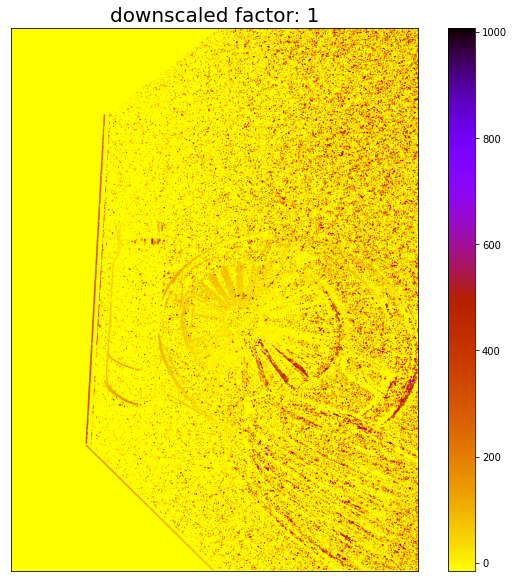

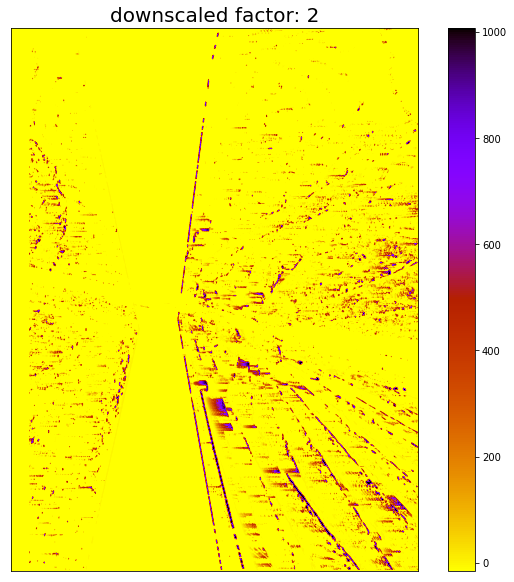

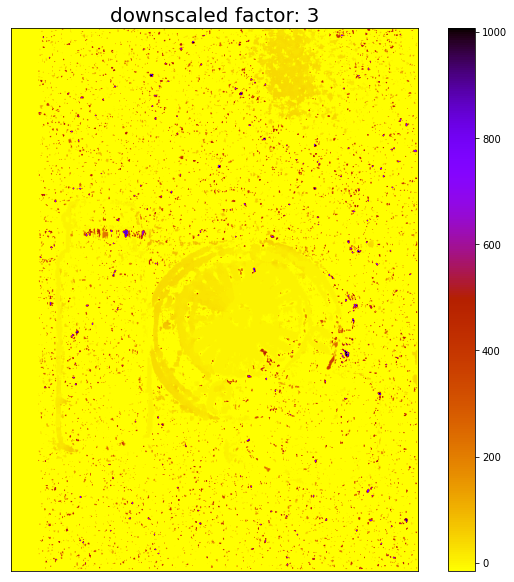

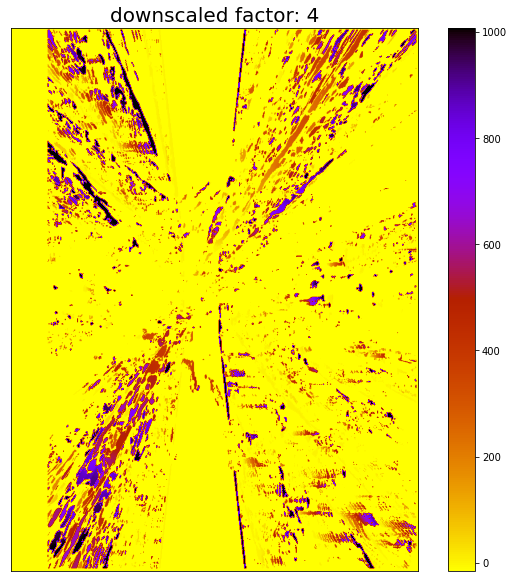

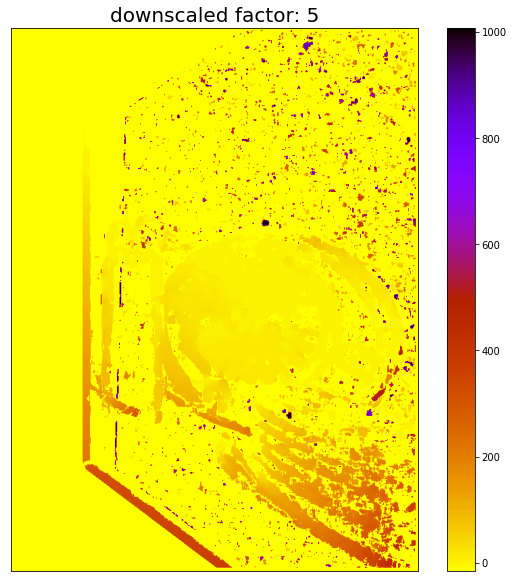

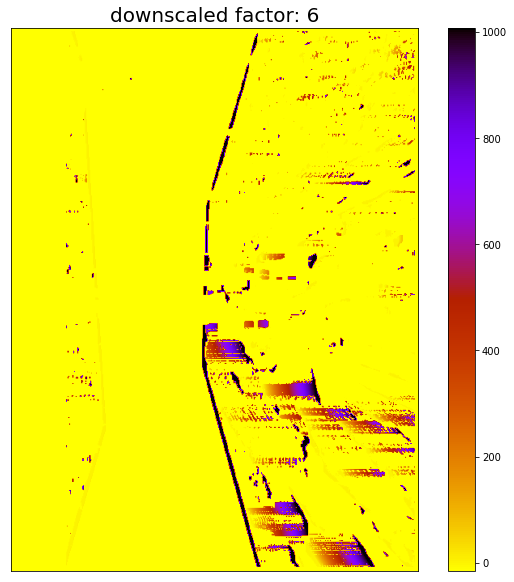

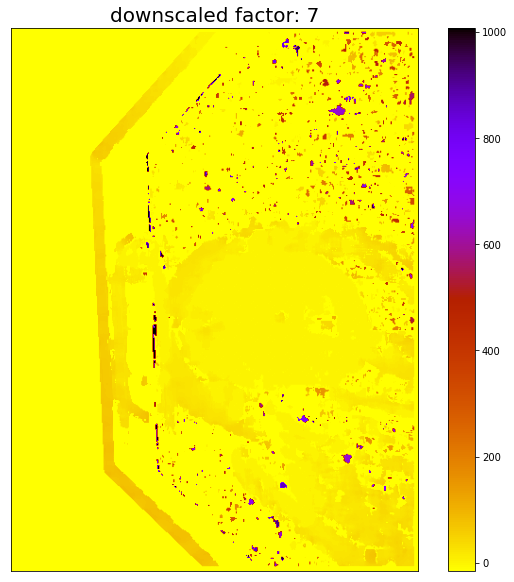

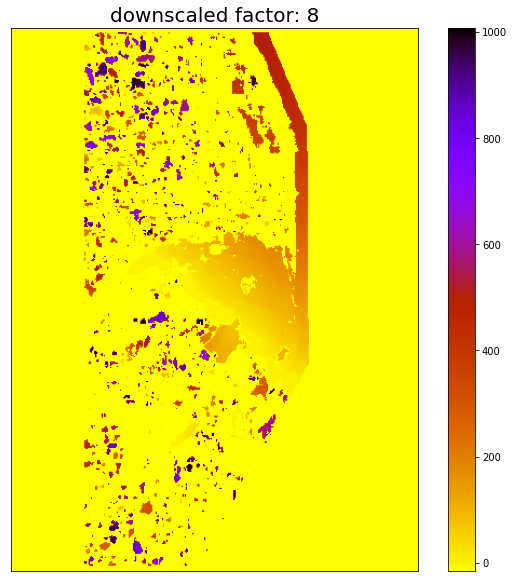

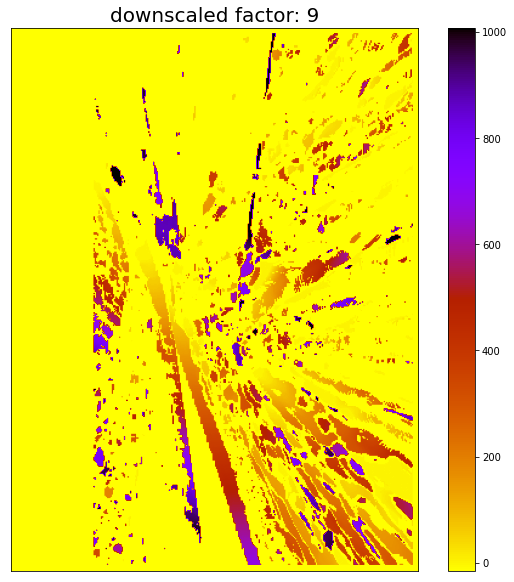

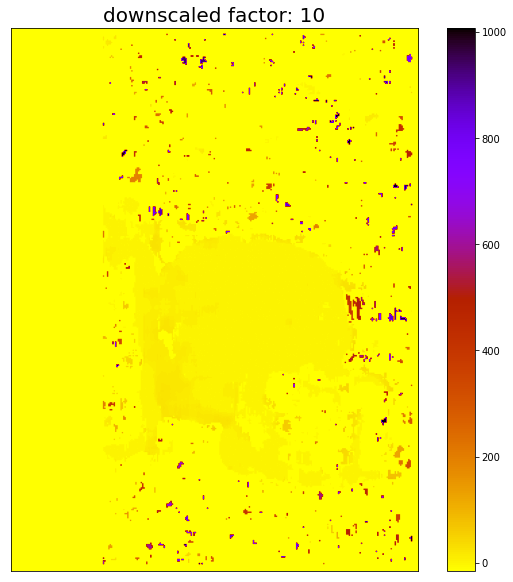

In [11]:
rescale_vals = [1,2,3,4,5,6,7,8,9,10]

for i in rescale_vals:
    img1,img2 = a7_func.load_images('JPEG image 4.jpeg', 'JPEG image 5.jpeg', i)
    key1,key2,des1,des2,matches = a7_func.find_matching_points(img1,img2, 'ORB')
    pts1, pts2, good_matches, F, inliers = a7_func.estimate_fundamental_matrix(key1, key2, matches, 0.5)
    threshold = 0
    img1_rec, img2_rec = a7_func.rectify_images(img1,img2,pts1,pts2,F, threshold)
    
    numDisparities = 16*4
    blockSize = 5+(2*3)
    disparity = a7_func.get_disparity_map(img1,img2,numDisparities, blockSize)
    disparity_rec = a7_func.get_disparity_map(img1_rec,img2_rec,numDisparities, blockSize)
    
    #plt.subplot(2,5,i)
    plt.figure(figsize = (21/2,10))
    plt.imshow(disparity_rec, cmap = 'gnuplot_r')
    plt.title('downscaled factor: '+ str(i), fontsize = 20)
    plt.colorbar(shrink = 1.0)
    plt.xticks([])
    plt.yticks([])
    plt.savefig('Figures_down/disparity{}.png'.format(i), dpi = 300, bbox_inches = 'tight')
    plt.show()